In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r"D:\Data Scientist\Supervised Learning\Shallow Machine Learning Models\KNN\Datasets\wbcd.csv")

In [3]:
data

,id,diagnosis,Sex,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,F,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,M,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,M,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,F,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,F,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,F,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,M,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,F,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,M,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   Sex                569 non-null    object 
 3   radius_mean        569 non-null    float64
 4   texture_mean       569 non-null    float64
 5   perimeter_mean     569 non-null    float64
 6   area_mean          569 non-null    float64
 7   smoothness_mean    569 non-null    float64
 8   compactness_mean   569 non-null    float64
 9   concavity_mean     569 non-null    float64
 10  points_mean        569 non-null    float64
 11  symmetry_mean      569 non-null    float64
 12  dimension_mean     569 non-null    float64
 13  radius_se          569 non-null    float64
 14  texture_se         569 non-null    float64
 15  perimeter_se       569 non-null    float64
 16  area_se            569 non

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
data.drop(['id'],axis = 1,inplace = True)

In [7]:
data

,diagnosis,Sex,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,F,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,M,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,M,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,F,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,F,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,B,F,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,B,M,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,M,F,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,B,M,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [8]:
data['diagnosis'] = np.where(data['diagnosis'] == 'B', 'Benign', data['diagnosis'])
data['diagnosis'] = np.where(data['diagnosis'] == 'M', 'Malignant', data['diagnosis'])

In [9]:
data

,diagnosis,Sex,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,Benign,F,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,Benign,M,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,Benign,M,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,Benign,F,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,Benign,F,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,Benign,F,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,Benign,M,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,Malignant,F,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,Benign,M,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [10]:
duplicates = data.duplicated()
duplicates.sum()

0

In [11]:
data.isna().sum()

diagnosis            0
Sex                  0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [12]:
df_cate = data.iloc[ : , :2]
df_cate

,diagnosis,Sex
0,Benign,F
1,Benign,M
2,Benign,M
3,Benign,F
4,Benign,F
...,...,...
564,Benign,F
565,Benign,M
566,Malignant,F
567,Benign,M


In [13]:
df_num = data.iloc[ : ,2: ]
df_num

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [14]:
# Assuming df is your DataFrame with 33 numerical features
numerical_features = df_num.columns
numerical_features

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean', 'points_mean',
       'symmetry_mean', 'dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'points_se', 'symmetry_se', 'dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

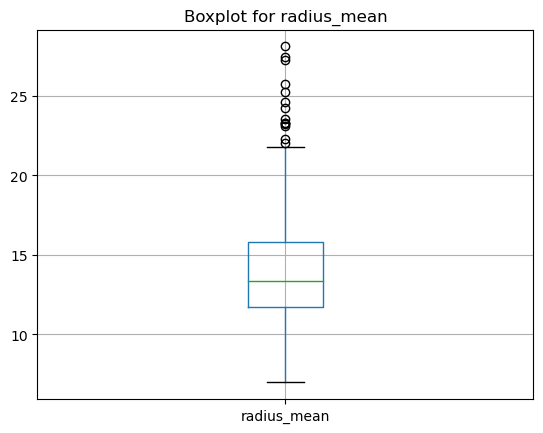

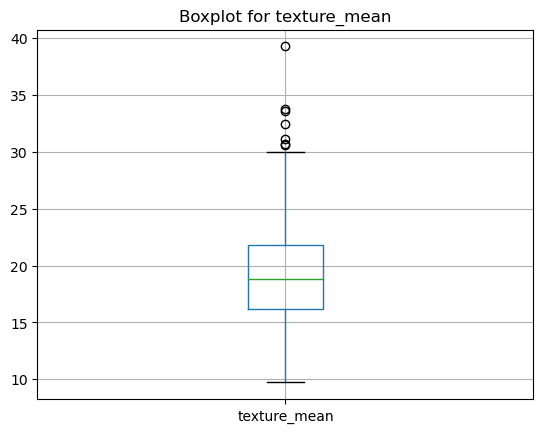

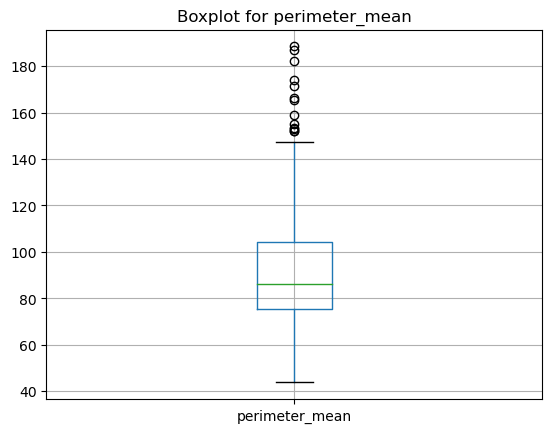

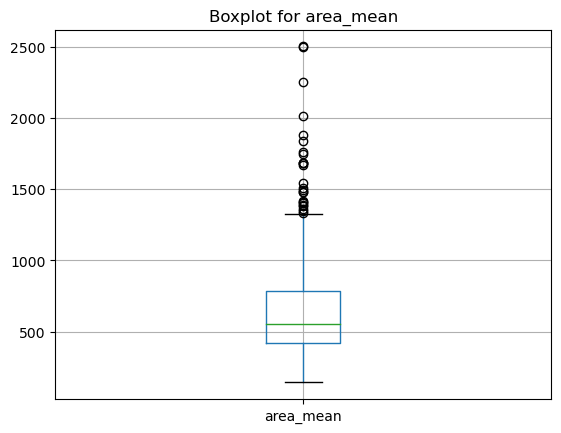

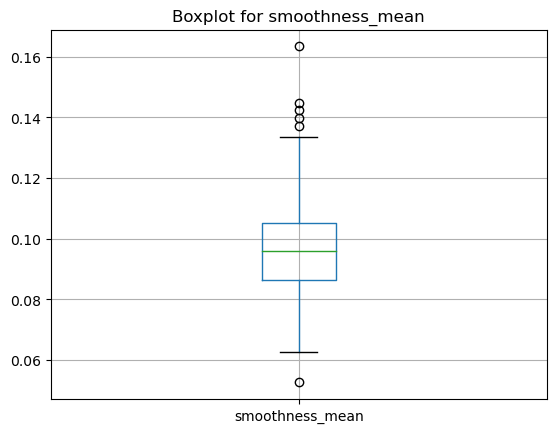

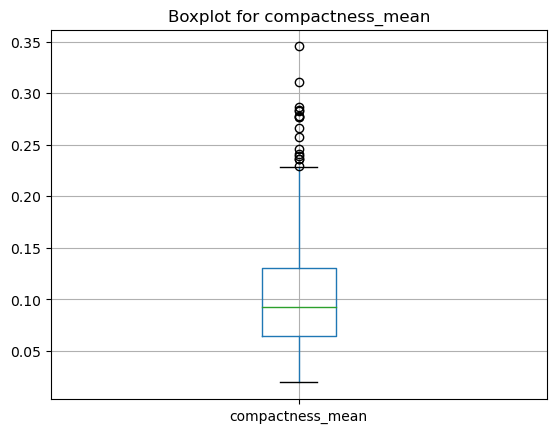

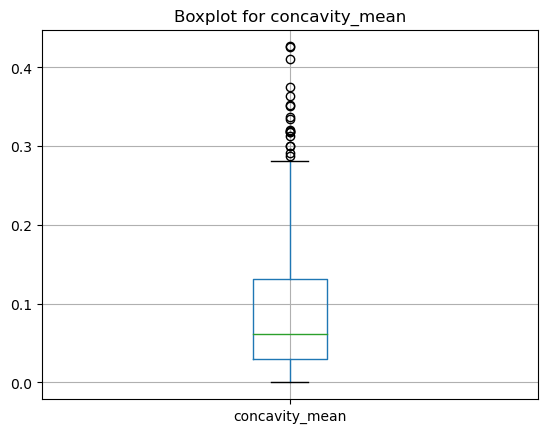

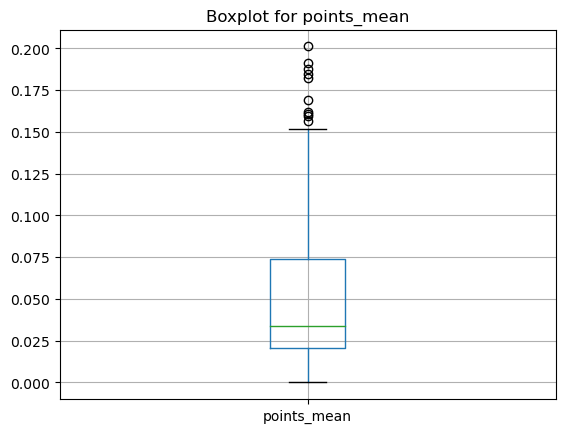

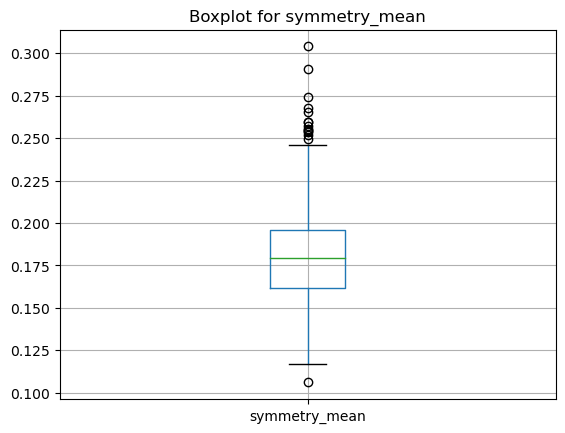

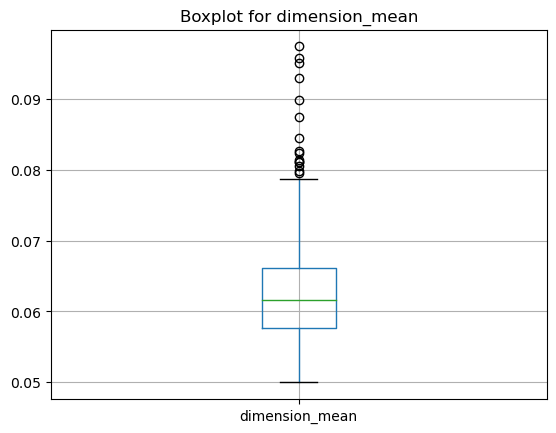

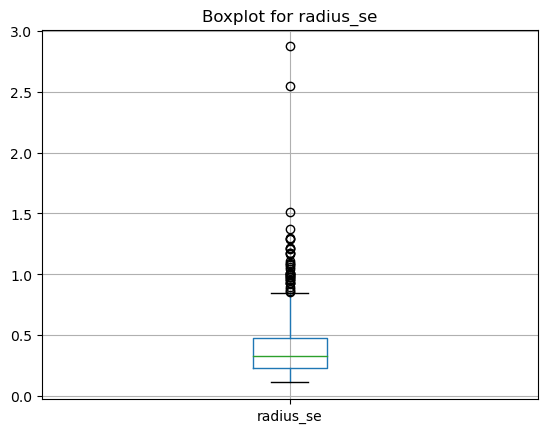

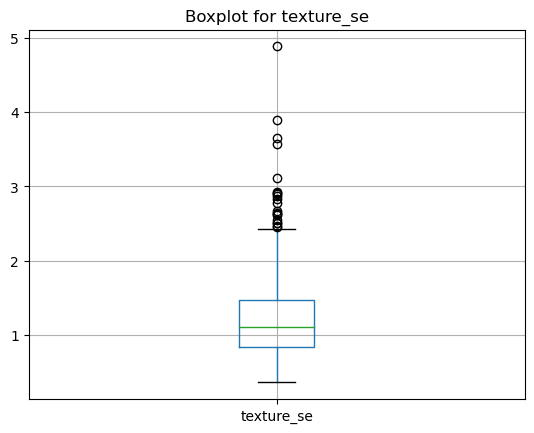

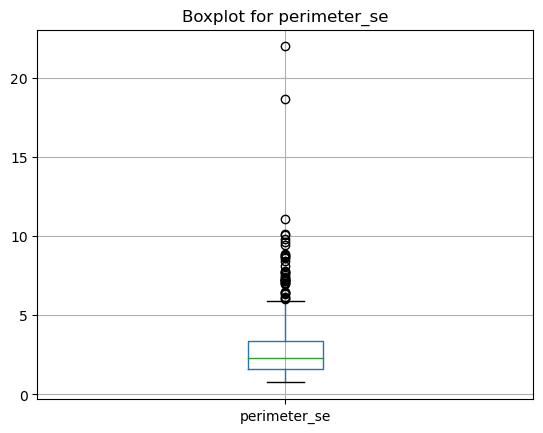

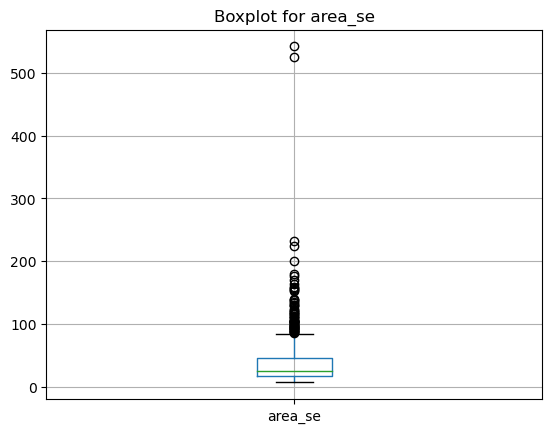

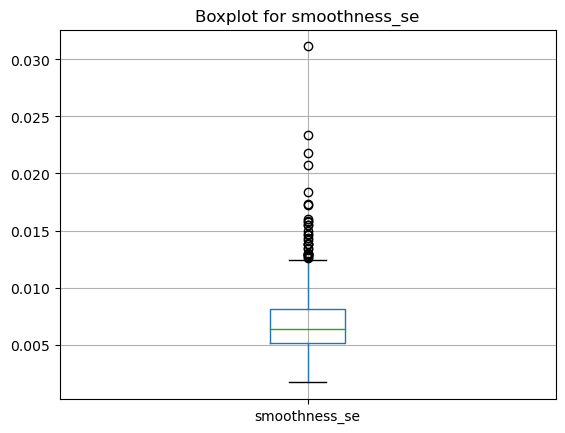

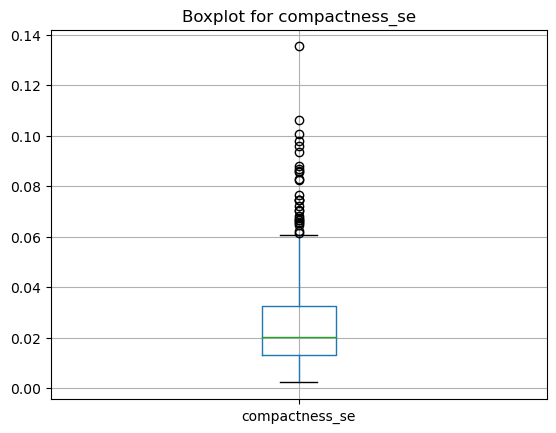

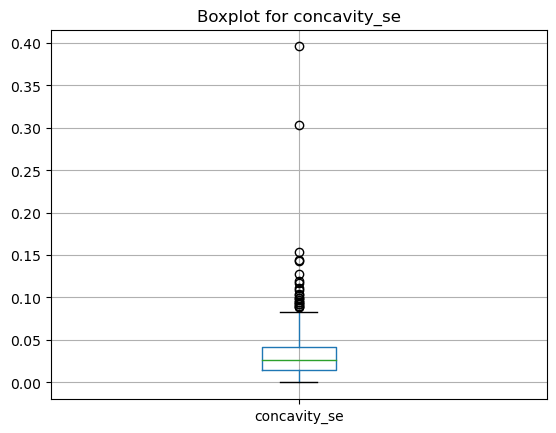

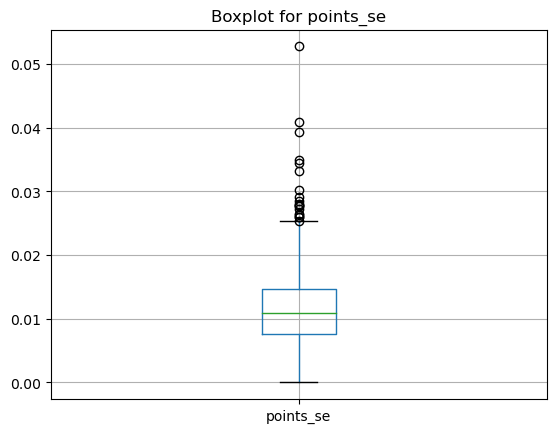

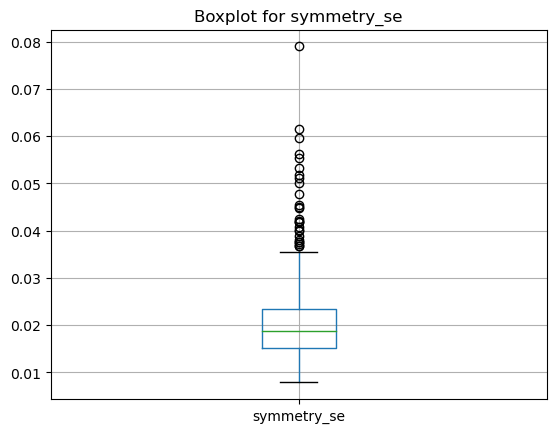

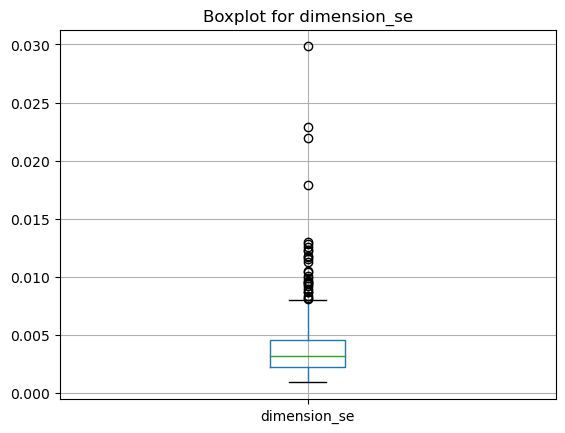

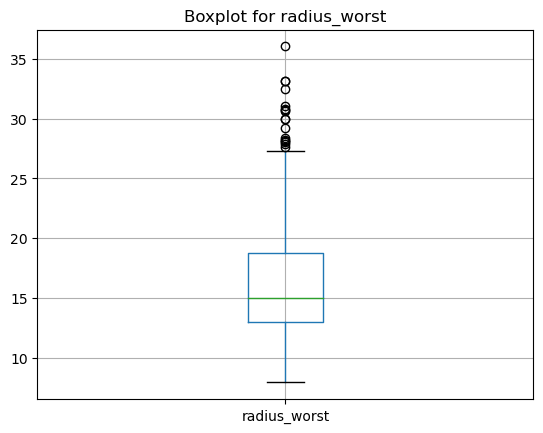

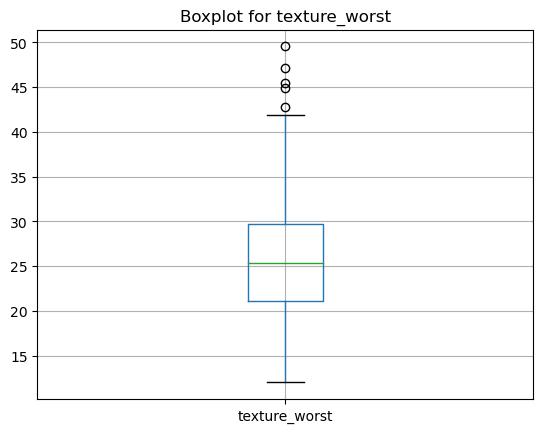

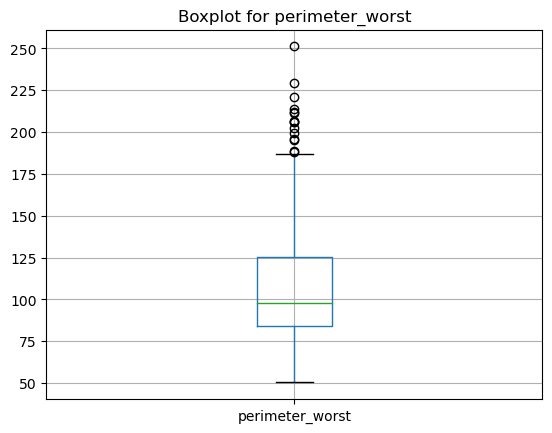

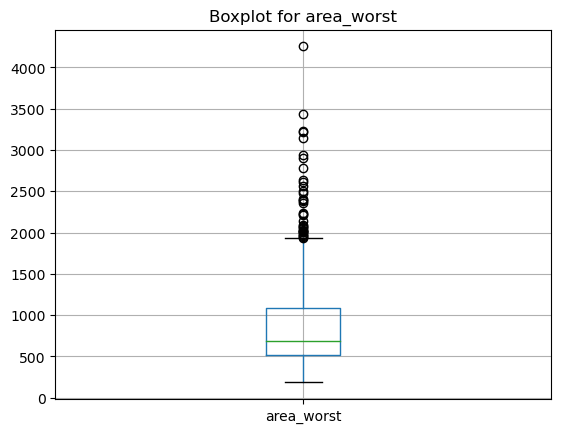

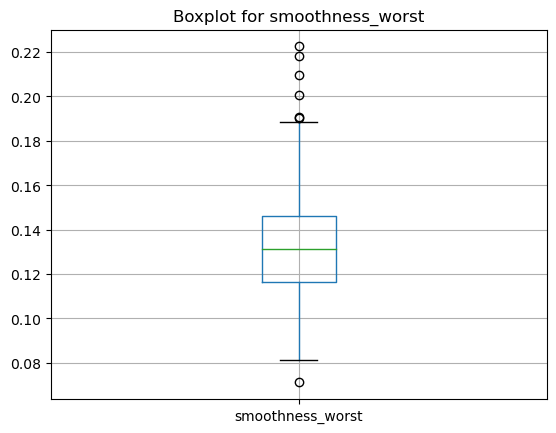

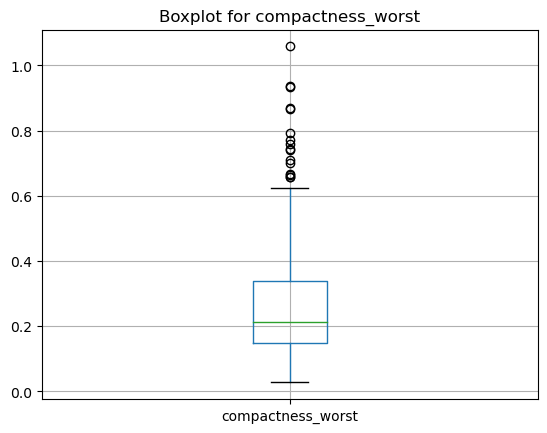

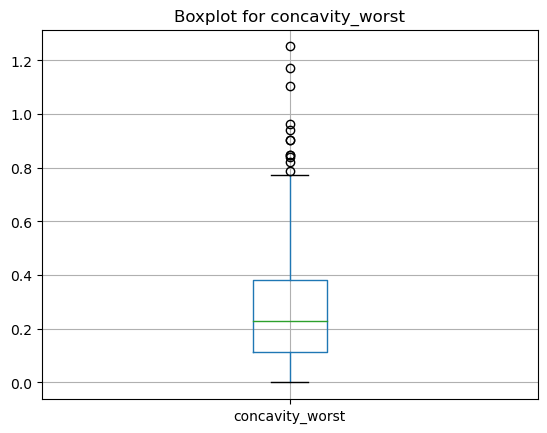

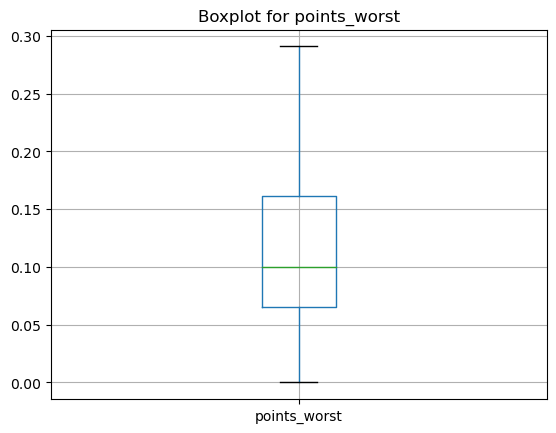

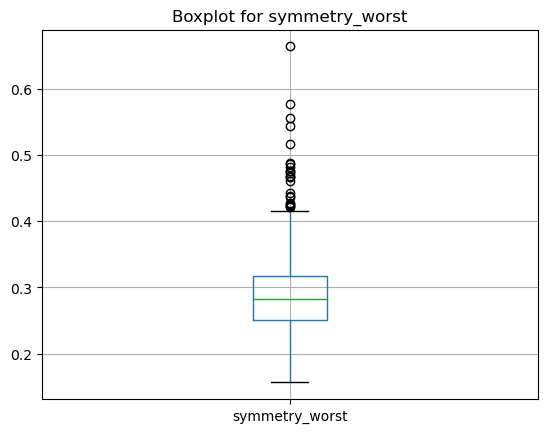

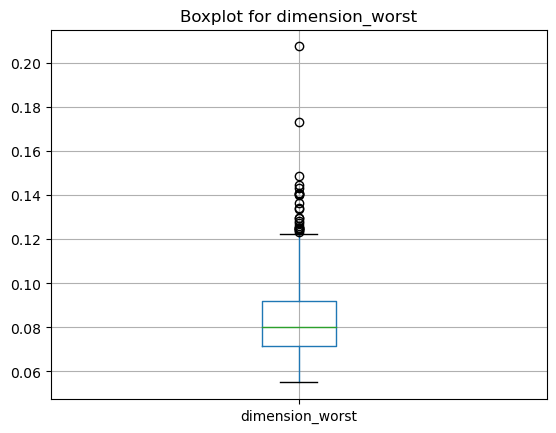

In [15]:
# Plot each feature in a separate box plot
for feature in numerical_features:
    df_num.boxplot(column=feature)
    plt.title(f'Boxplot for {feature}')
    plt.show()

In [16]:
numerical_features = df_num.columns
numerical_features

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean', 'points_mean',
       'symmetry_mean', 'dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'points_se', 'symmetry_se', 'dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [17]:
from feature_engine.outliers import Winsorizer

In [18]:
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5)

In [19]:
df_winsorized = winsorizer.fit_transform(df_num[numerical_features])

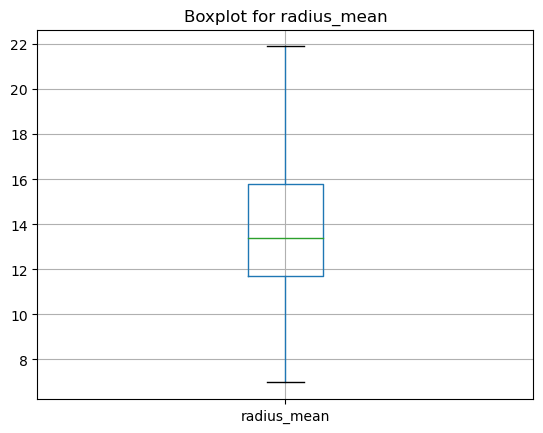

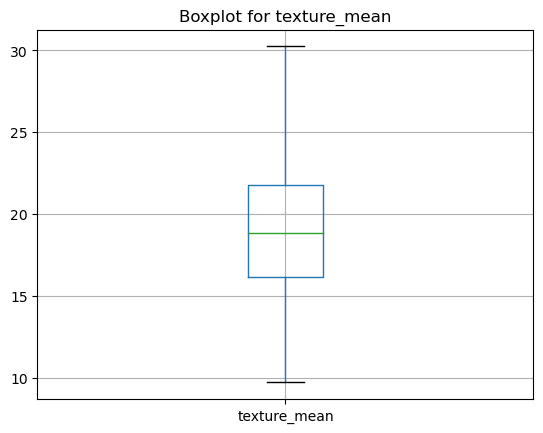

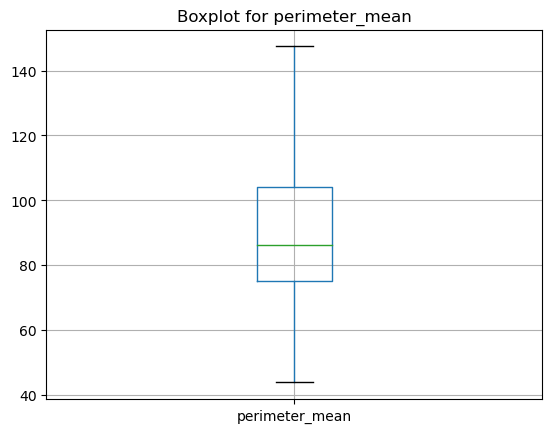

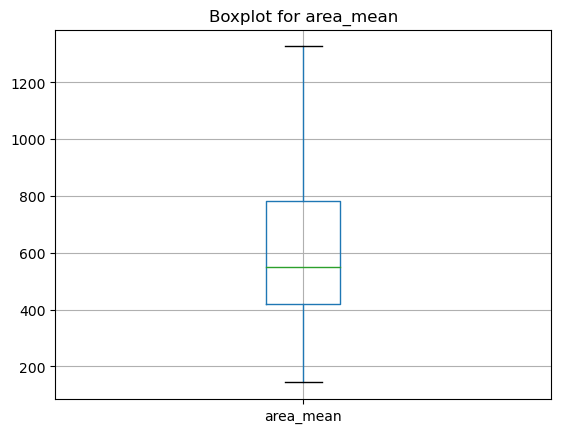

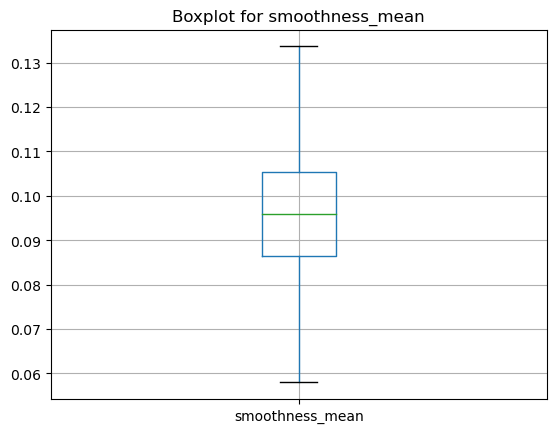

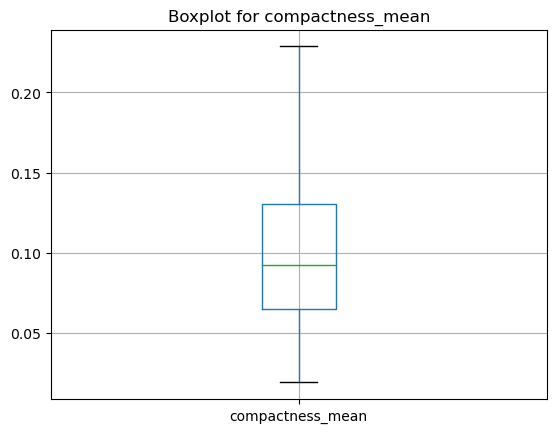

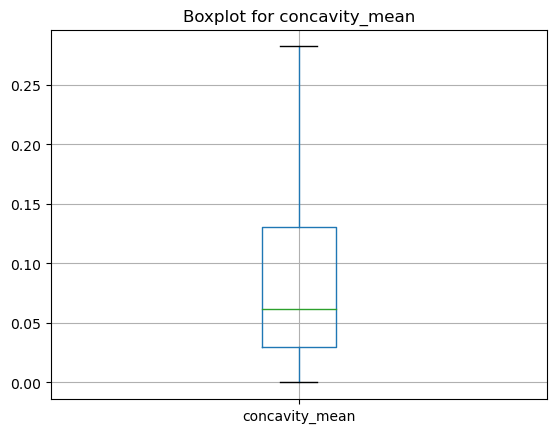

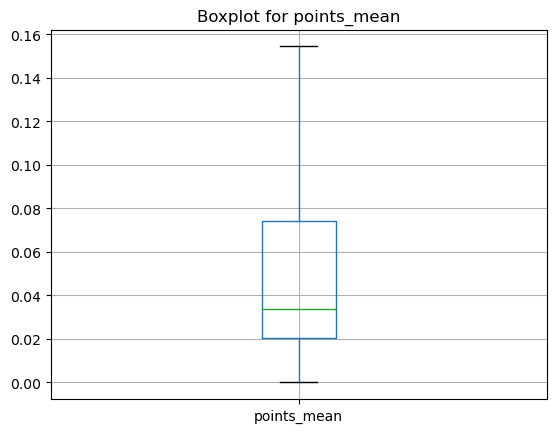

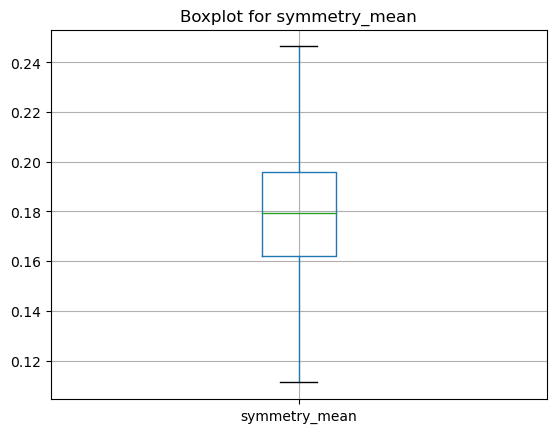

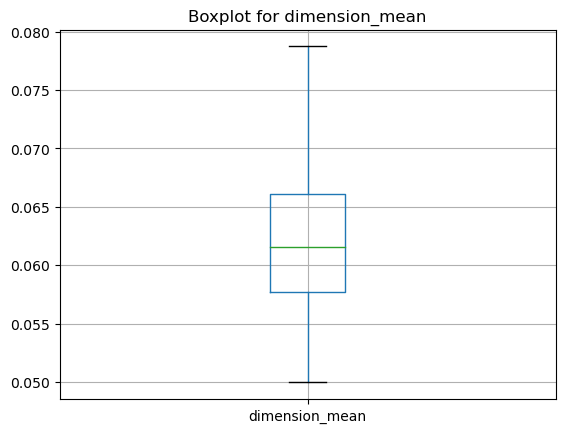

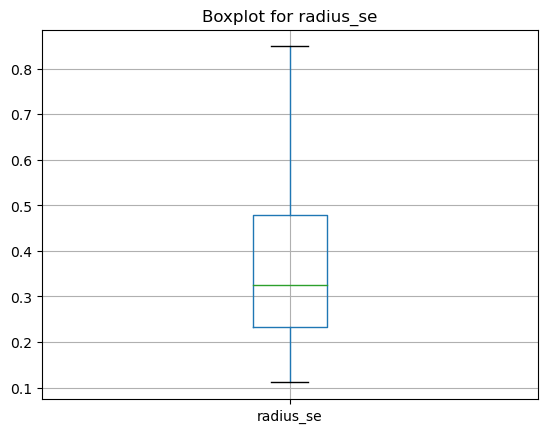

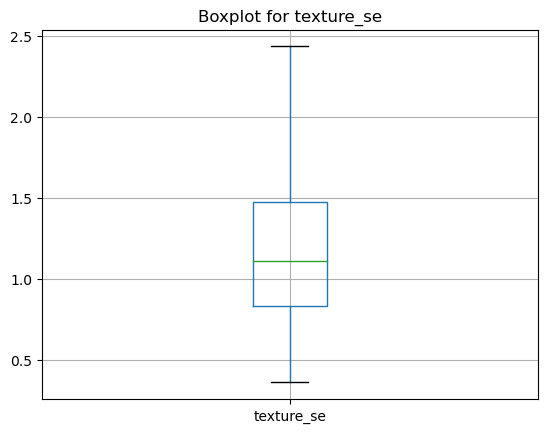

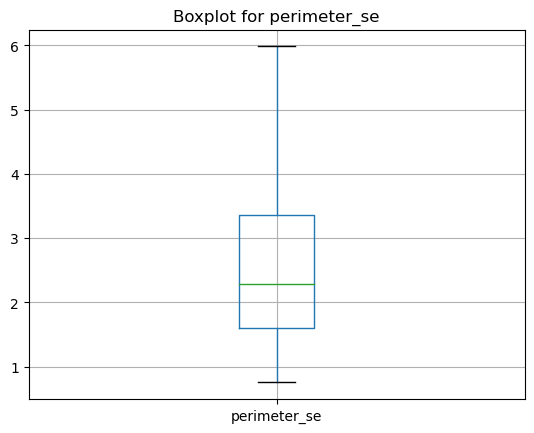

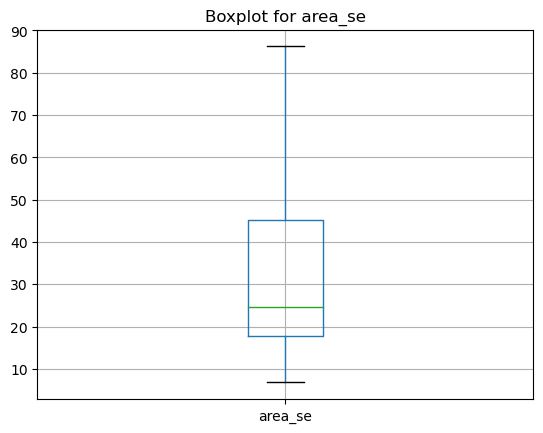

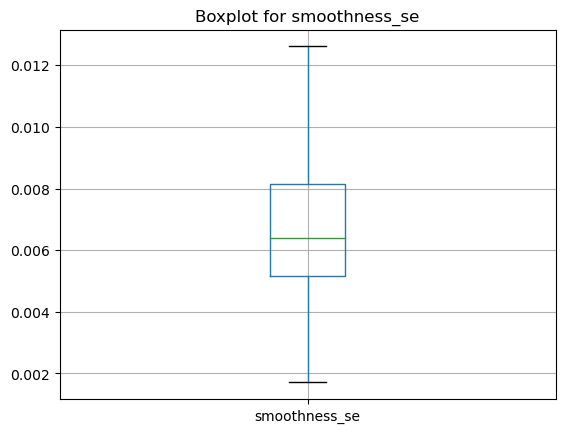

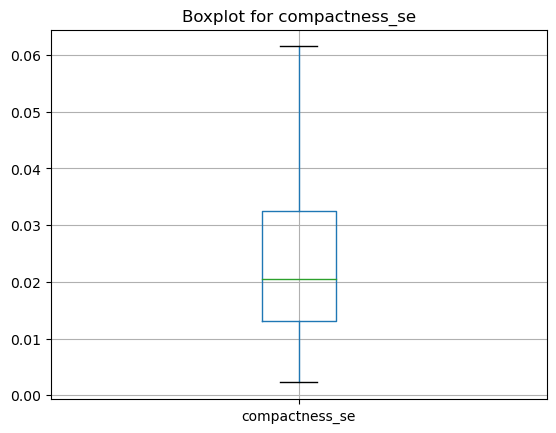

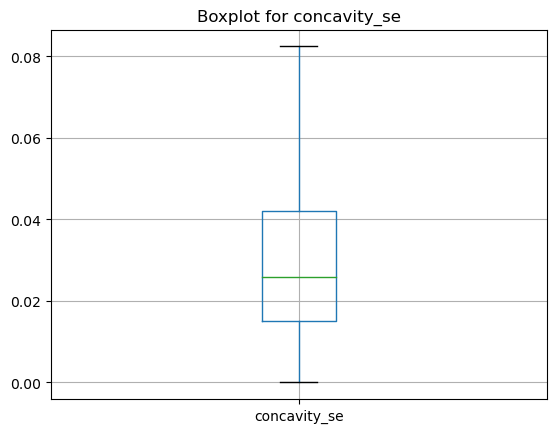

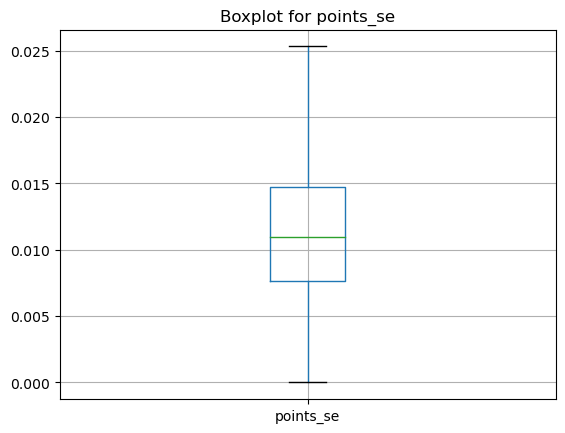

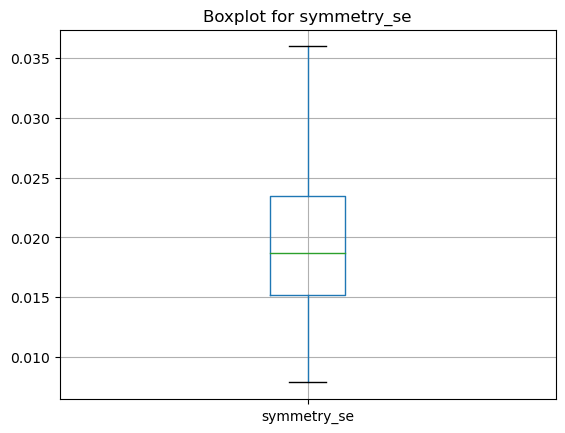

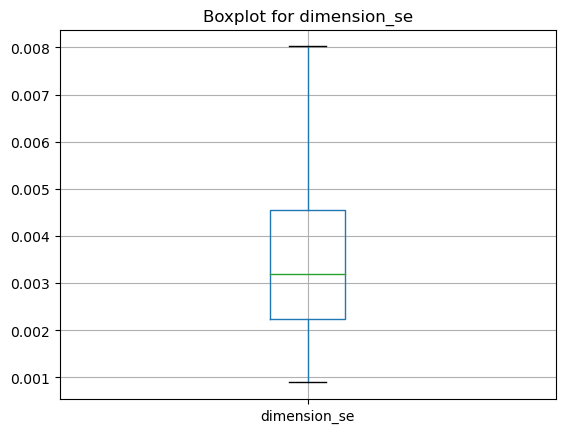

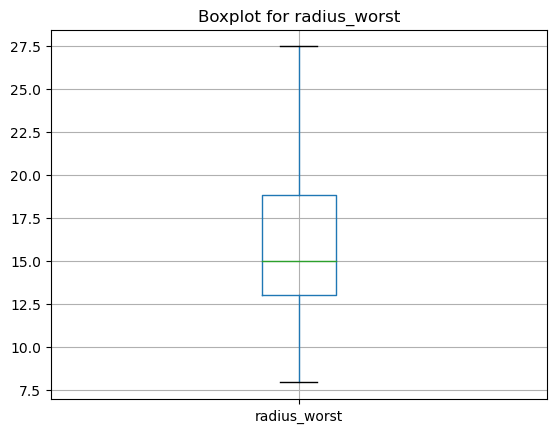

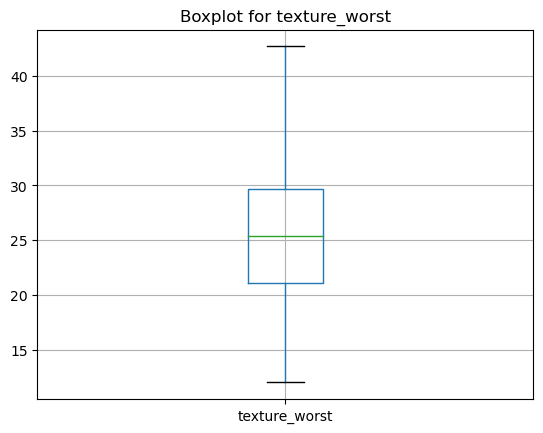

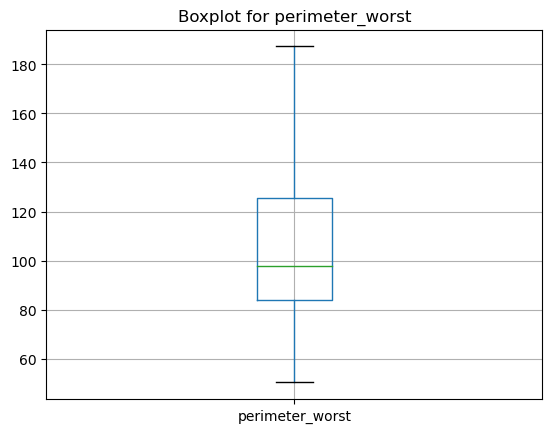

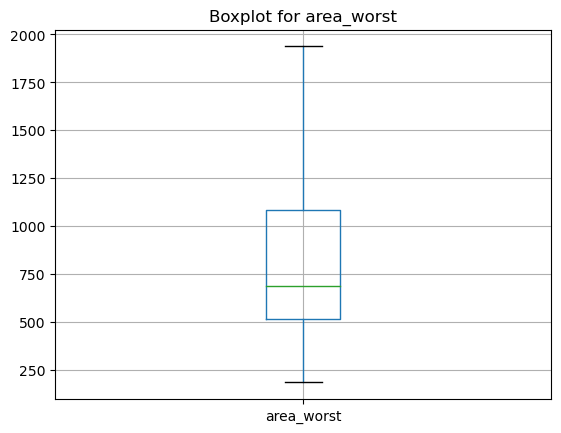

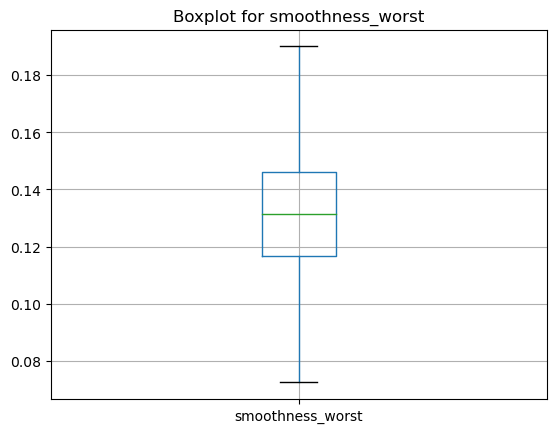

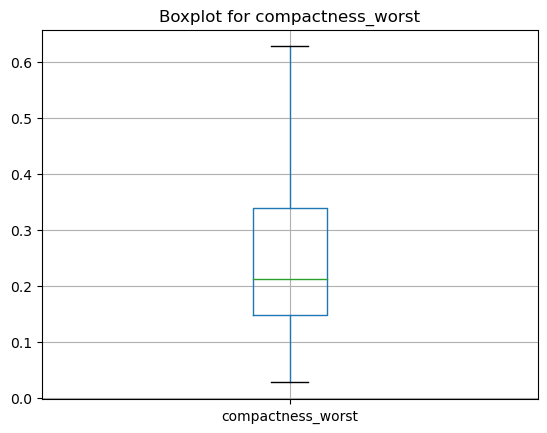

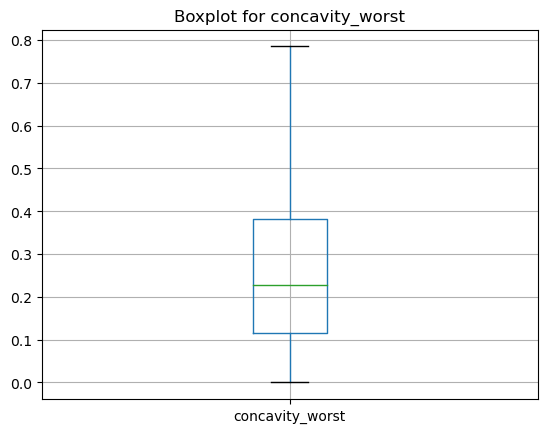

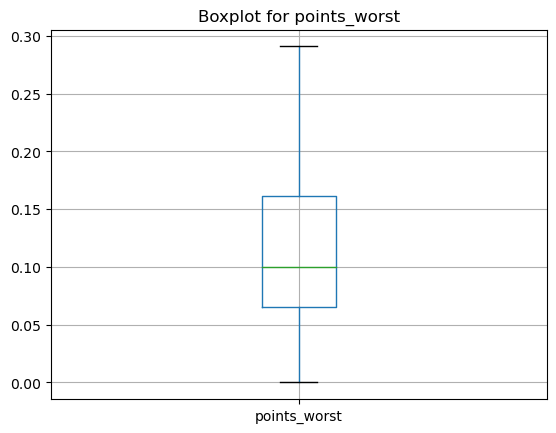

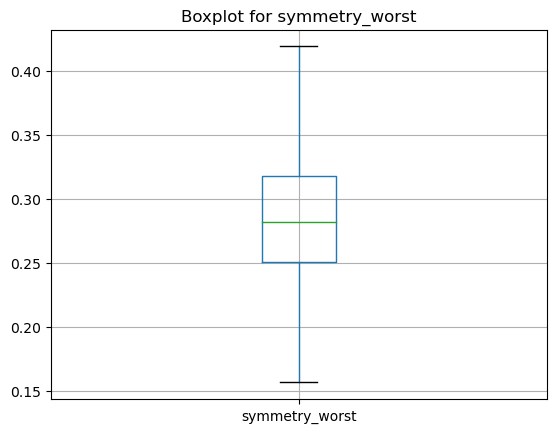

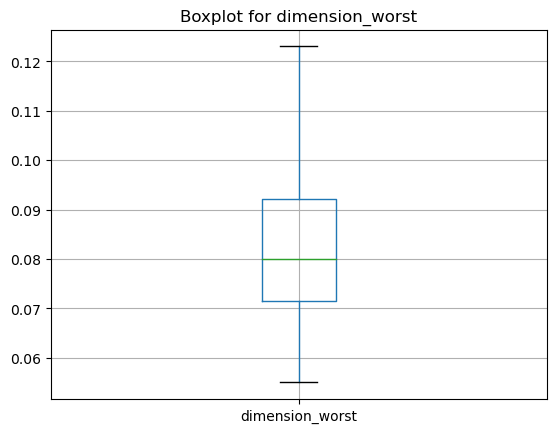

In [20]:
for feature in numerical_features:
    df_winsorized.boxplot(column=feature)
    plt.title(f'Boxplot for {feature}')
    plt.show()

In [21]:
df_winsorized

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [22]:
df_cate.Sex.unique()

array(['F', 'M '], dtype=object)

In [23]:
df_cate.Sex.value_counts()

Sex
F     303
M     266
Name: count, dtype: int64

In [24]:
df_cate = pd.get_dummies(df_cate,columns = ['Sex'],drop_first = True,dtype = int)


In [25]:
df_cate

,diagnosis,Sex_M
0,Benign,0
1,Benign,1
2,Benign,1
3,Benign,0
4,Benign,0
...,...,...
564,Benign,0
565,Benign,1
566,Malignant,0
567,Benign,1


In [26]:
print(df_cate.columns)


Index(['diagnosis', 'Sex_M '], dtype='object')


In [27]:
df_winsorized

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [28]:
col = list(df_winsorized.columns)
print(col)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'points_se', 'symmetry_se', 'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst']


In [29]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
df_num = scaler.fit_transform(df_winsorized)

In [33]:
df_num

array([[0.35786581, 0.13050889, 0.33807435, ..., 0.32271478, 0.48048734,
        0.18640577],
       [0.24257658, 0.44996348, 0.24579336, ..., 0.27237113, 0.52351038,
        0.30645873],
       [0.27206917, 0.3467251 , 0.26160744, ..., 0.25536082, 0.54559299,
        0.34971311],
       ...,
       [0.55627053, 0.61845629, 0.53160407, ..., 0.42130584, 0.61298306,
        0.62792408],
       [0.50599906, 0.20793767, 0.48281182, ..., 0.36735395, 0.39634495,
        0.33926732],
       [0.96447483, 0.26247869, 0.94026325, ..., 0.67560137, 0.44355606,
        0.46520524]])

In [34]:
df_num = pd.DataFrame(df_num, columns = col)

In [35]:
df_num.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0.357866,0.130509,0.338074,0.271052,0.591984,0.241015,0.141178,0.239428,0.626479,0.333102,...,0.285202,0.118069,0.267007,0.207723,0.561224,0.165611,0.158116,0.322715,0.480487,0.186406
1,0.242577,0.449963,0.245793,0.171542,0.513801,0.455553,0.226161,0.170965,0.599112,0.519278,...,0.202253,0.356164,0.203542,0.136770,0.414966,0.373895,0.243921,0.272371,0.523510,0.306459
2,0.272069,0.346725,0.261607,0.194200,0.656696,0.280348,0.107857,0.160481,0.445266,0.466829,...,0.229391,0.470320,0.215592,0.163370,0.547619,0.201631,0.135837,0.255361,0.545593,0.349713
3,0.288156,0.179206,0.281664,0.204007,0.771593,0.450296,0.164123,0.310350,0.487426,0.373741,...,0.204301,0.122309,0.190761,0.142021,0.545918,0.258330,0.110363,0.295911,0.204455,0.188318
4,0.550238,0.170441,0.519358,0.480470,0.285988,0.238769,0.120144,0.171935,0.450444,0.190344,...,0.423451,0.121005,0.395034,0.361846,0.340986,0.244155,0.173393,0.281031,0.351038,0.185670


In [36]:
df = pd.concat([df_cate,df_num],axis = 1)

In [37]:
df

,diagnosis,Sex_M,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,Benign,0,0.357866,0.130509,0.338074,0.271052,0.591984,0.241015,0.141178,0.239428,...,0.285202,0.118069,0.267007,0.207723,0.561224,0.165611,0.158116,0.322715,0.480487,0.186406
1,Benign,1,0.242577,0.449963,0.245793,0.171542,0.513801,0.455553,0.226161,0.170965,...,0.202253,0.356164,0.203542,0.136770,0.414966,0.373895,0.243921,0.272371,0.523510,0.306459
2,Benign,1,0.272069,0.346725,0.261607,0.194200,0.656696,0.280348,0.107857,0.160481,...,0.229391,0.470320,0.215592,0.163370,0.547619,0.201631,0.135837,0.255361,0.545593,0.349713
3,Benign,0,0.288156,0.179206,0.281664,0.204007,0.771593,0.450296,0.164123,0.310350,...,0.204301,0.122309,0.190761,0.142021,0.545918,0.258330,0.110363,0.295911,0.204455,0.188318
4,Benign,0,0.550238,0.170441,0.519358,0.480470,0.285988,0.238769,0.120144,0.171935,...,0.423451,0.121005,0.395034,0.361846,0.340986,0.244155,0.173393,0.281031,0.351038,0.185670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,Benign,0,0.414840,0.414414,0.390434,0.332939,0.220351,0.193844,0.172055,0.185718,...,0.356887,0.387149,0.326383,0.286783,0.473639,0.282177,0.238829,0.359107,0.255092,0.209063
565,Benign,1,0.219787,0.243487,0.216094,0.150575,0.539422,0.345106,0.126801,0.131815,...,0.151050,0.243314,0.149571,0.098125,0.539966,0.227312,0.091178,0.140000,0.330859,0.439017
566,Malignant,0,0.556271,0.618456,0.531604,0.479456,0.430468,0.410151,0.190326,0.211150,...,0.505376,0.522179,0.462954,0.449753,0.489796,0.504636,0.462126,0.421306,0.612983,0.627924
567,Benign,1,0.505999,0.207938,0.482812,0.423318,0.685750,0.349073,0.244149,0.420293,...,0.402970,0.160144,0.384809,0.322345,0.528912,0.200964,0.174793,0.367354,0.396345,0.339267


In [38]:
df.describe()

,Sex_M,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.467487,0.474691,0.464803,0.460477,0.419568,0.505691,0.400696,0.307839,0.314183,0.514307,...,0.422626,0.444503,0.411140,0.379432,0.507733,0.371198,0.342143,0.393836,0.499205,0.416395
std,0.499381,0.223877,0.203921,0.222238,0.258153,0.180727,0.236023,0.261677,0.243523,0.192804,...,0.234882,0.197469,0.233396,0.271510,0.189796,0.238220,0.251383,0.225884,0.205095,0.235299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.316308,0.314585,0.302589,0.234021,0.375000,0.217645,0.104671,0.131427,0.375000,...,0.260113,0.295499,0.246120,0.188429,0.375000,0.199963,0.145767,0.223127,0.357510,0.241577
50%,0.000000,0.428246,0.444607,0.409334,0.344606,0.500462,0.350076,0.217910,0.216779,0.502959,...,0.360471,0.436725,0.345079,0.286155,0.500000,0.307858,0.288606,0.343402,0.478584,0.367809
75%,1.000000,0.589785,0.588751,0.581553,0.540413,0.625000,0.530587,0.462802,0.478856,0.625000,...,0.556068,0.577299,0.547672,0.513058,0.625000,0.519978,0.487460,0.554639,0.614506,0.544946
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [40]:
X = df.iloc[ : ,1 : ]
X

,Sex_M,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0,0.357866,0.130509,0.338074,0.271052,0.591984,0.241015,0.141178,0.239428,0.626479,...,0.285202,0.118069,0.267007,0.207723,0.561224,0.165611,0.158116,0.322715,0.480487,0.186406
1,1,0.242577,0.449963,0.245793,0.171542,0.513801,0.455553,0.226161,0.170965,0.599112,...,0.202253,0.356164,0.203542,0.136770,0.414966,0.373895,0.243921,0.272371,0.523510,0.306459
2,1,0.272069,0.346725,0.261607,0.194200,0.656696,0.280348,0.107857,0.160481,0.445266,...,0.229391,0.470320,0.215592,0.163370,0.547619,0.201631,0.135837,0.255361,0.545593,0.349713
3,0,0.288156,0.179206,0.281664,0.204007,0.771593,0.450296,0.164123,0.310350,0.487426,...,0.204301,0.122309,0.190761,0.142021,0.545918,0.258330,0.110363,0.295911,0.204455,0.188318
4,0,0.550238,0.170441,0.519358,0.480470,0.285988,0.238769,0.120144,0.171935,0.450444,...,0.423451,0.121005,0.395034,0.361846,0.340986,0.244155,0.173393,0.281031,0.351038,0.185670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,0.414840,0.414414,0.390434,0.332939,0.220351,0.193844,0.172055,0.185718,0.252959,...,0.356887,0.387149,0.326383,0.286783,0.473639,0.282177,0.238829,0.359107,0.255092,0.209063
565,1,0.219787,0.243487,0.216094,0.150575,0.539422,0.345106,0.126801,0.131815,0.385355,...,0.151050,0.243314,0.149571,0.098125,0.539966,0.227312,0.091178,0.140000,0.330859,0.439017
566,0,0.556271,0.618456,0.531604,0.479456,0.430468,0.410151,0.190326,0.211150,0.454882,...,0.505376,0.522179,0.462954,0.449753,0.489796,0.504636,0.462126,0.421306,0.612983,0.627924
567,1,0.505999,0.207938,0.482812,0.423318,0.685750,0.349073,0.244149,0.420293,0.397929,...,0.402970,0.160144,0.384809,0.322345,0.528912,0.200964,0.174793,0.367354,0.396345,0.339267


In [41]:
y = df['diagnosis']
y

0         Benign
1         Benign
2         Benign
3         Benign
4         Benign
         ...    
564       Benign
565       Benign
566    Malignant
567       Benign
568    Malignant
Name: diagnosis, Length: 569, dtype: object

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [44]:
y_pred = rf_model.predict(X_test)

In [45]:
y_pred 

array(['Benign', 'Malignant', 'Benign', 'Malignant', 'Malignant',
       'Benign', 'Malignant', 'Benign', 'Benign', 'Malignant',
       'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Malignant',
       'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant',
       'Benign', 'Malignant', 'Malignant', 'Malignant', 'Malignant',
       'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Benign', 'Malignant', 'Malignant', 'Malignant',
       'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Malignant', 'Malignant', 'Benign', 'Benign', 'Malignant',
       'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign',
       'Benign', 'Malignant', 'Benign', 'Benign', 'Malignant',
       'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign',
       'Malignant', 'Malignant', 'Malignant', 'Benign', 'Malignant',
       'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign',
       'Malignant', 'Benign', 'Benign', 'Malignant

In [48]:
print("Accuracy:", accuracy_score(y_test, y_pred))
('\n')

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
('\n')

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544
Confusion Matrix:
 [[71  3]
 [ 1 39]]
Classification Report:
               precision    recall  f1-score   support

      Benign       0.99      0.96      0.97        74
   Malignant       0.93      0.97      0.95        40

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [49]:
y_pred_train = rf_model.predict(X_train)

In [50]:
print("Accuracy:", accuracy_score(y_train,y_pred_train))

Accuracy: 1.0


In [51]:
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)


                   importance
area_worst           0.142914
points_mean          0.115728
perimeter_worst      0.110507
points_worst         0.100910
radius_worst         0.084244
concavity_mean       0.051247
concavity_worst      0.048159
perimeter_mean       0.047659
area_se              0.043821
area_mean            0.042470
radius_mean          0.034531
compactness_worst    0.022580
compactness_mean     0.019237
texture_mean         0.015774
radius_se            0.013508
smoothness_worst     0.012738
texture_worst        0.012701
concavity_se         0.009114
dimension_worst      0.009001
symmetry_worst       0.008359
perimeter_se         0.008176
texture_se           0.006777
compactness_se       0.006480
smoothness_mean      0.005778
dimension_se         0.005596
dimension_mean       0.004857
points_se            0.004492
smoothness_se        0.004210
symmetry_se          0.004018
symmetry_mean        0.003752
Sex_M                0.000664


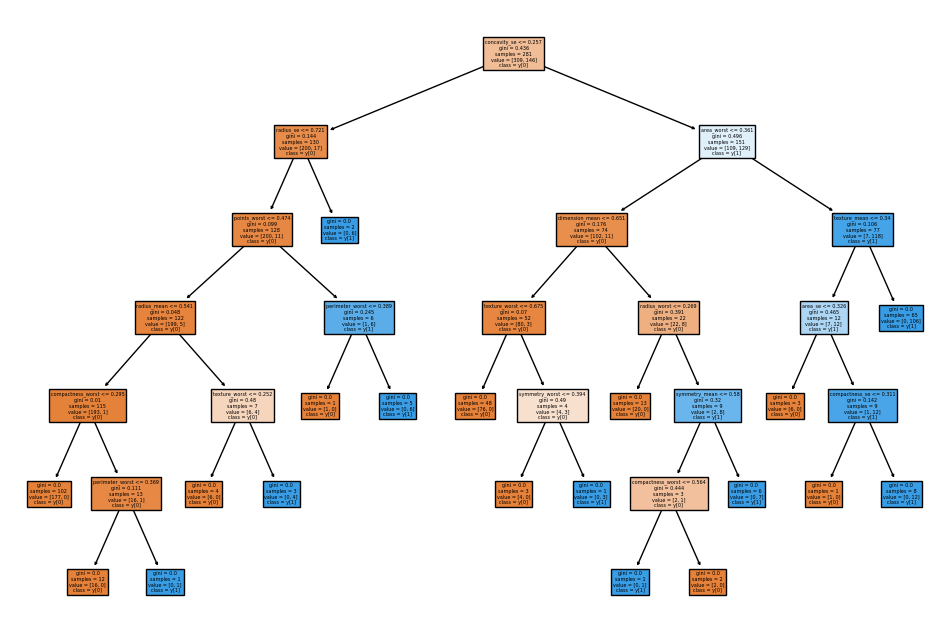

In [52]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming you have already trained your RandomForestClassifier 'rf_model'
# Extract one of the trees from the forest, e.g., the first tree (index 0)
tree_to_visualize = rf_model.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_to_visualize, filled=True, feature_names=X.columns, class_names=True)
plt.show()


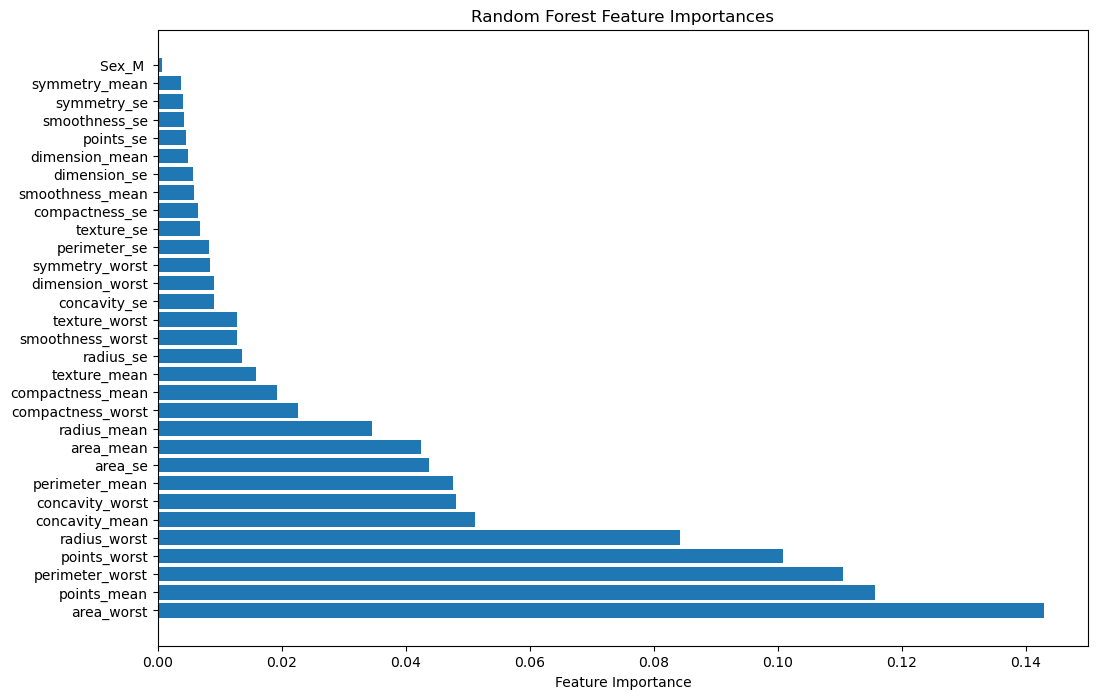

In [53]:
# Assuming you have already trained your RandomForestClassifier 'rf_model'
# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()


In [54]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

In [56]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
y_pred = dt_model.predict(X_test)

In [58]:
y_pred_train = dt_model.predict(X_train)

In [59]:
print("Accuracy:", accuracy_score(y_train, y_pred_train))

Accuracy: 1.0


In [60]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9385964912280702
Confusion Matrix:
 [[70  4]
 [ 3 37]]
Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      0.95      0.95        74
   Malignant       0.90      0.93      0.91        40

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



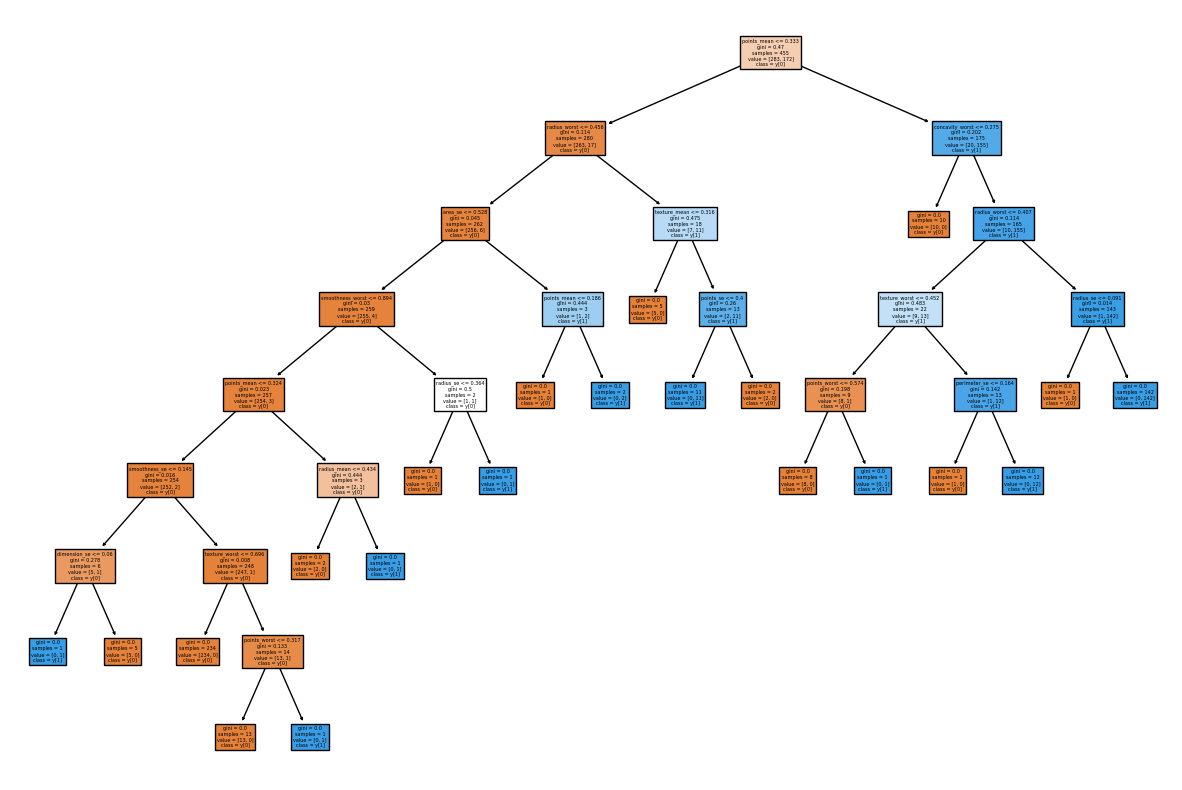

In [61]:
# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=True)
plt.show()